This code checks if the fixation classified as a face fixation with the FaceMapper falls within a bounding box of the face (also provided by the face mapper (RetinaFace)).

It combines "face_detections", "fixations_on_face" and "fixations" files from Pupil Cloud and makes a dataframe containing fixation ids and coordinates, fixation timestamps, information on wheather fixation was on the face; the bounding box coordinates of that face.
Then it checks whether fixation on the face is inside the bounding box and provides fixation ids and timestamps of the unmatched fixations (the ones not inside the bounding box). 

It should be run for each recording separetely.

In [8]:
# import statements
import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt

In [ ]:
# Get participant number input
participant_number = input("Enter participant number: ")

# Define the base path
base_path = 
# Build the folder path for the participant
folder_path = os.path.join(base_path, f"Participant {participant_number}")

# Get recording number input
recording_number = input("Enter recording number: ")

# recording folder path
recording_path = os.path.join(folder_path, f"P{participant_number}_{recording_number}")

# Read the files 
events_file = os.path.join(recording_path, f"events.csv")
face_detections_file =  os.path.join(recording_path, "face_detections.csv")
fixations_file = os.path.join(recording_path, "fixations.csv")
face_file = os.path.join(recording_path, "fixations_on_face.csv")

# Load the data
events_df = pd.read_csv(events_file)
face_detections_df = pd.read_csv(face_detections_file)
fixations_df = pd.read_csv(fixations_file)
face_df = pd.read_csv(face_file)

## "filter_by_intervals" function for leaving only experiment-relevant data
# This function is optional, but can be used to clean the data and remove time intervals when external triggerst were presented (when participants was not performing the experimental task).

def filter_by_intervals(df, intervals, timestamp_col='timestamp [ns]'):
    """
    Filters a DataFrame to include only rows where the timestamp falls within any given intervals.
    """
    filter = pd.Series(False, index=df.index)  # start with all False

    for start, end in intervals:
        filter |= (df[timestamp_col] >= start) & (df[timestamp_col] <= end)

    return df[filter]

## to filter each file by leaving only experiment timestamps

events_df = events_df.sort_values("timestamp [ns]")

# Filter for events where name == 'A'
A_events = events_df[events_df["name"] == "A"]
B_events = events_df[events_df["name"] == "B"]
C_events = events_df[events_df["name"] == "C"]
D_events = events_df[events_df["name"] == "D"]

# Get the highest (except D) and lowest (except A) timestamp from that filtered DataFrame
max_timestamp_A = A_events["timestamp [ns]"].max()
min_timestamp_B = B_events["timestamp [ns]"].min()

max_timestamp_B = B_events["timestamp [ns]"].max()
min_timestamp_C = C_events["timestamp [ns]"].min()

max_timestamp_C = C_events["timestamp [ns]"].max()
min_timestamp_D = D_events["timestamp [ns]"].min()

# intervals to use for filter_by_intervals function
intervals = [
    (max_timestamp_A, min_timestamp_B),
    (max_timestamp_B, min_timestamp_C),
    (max_timestamp_C, min_timestamp_D)
]

In [19]:
# cleaning all files for non-experiment sections with "filter_by_intervals" function
face_detections_df = filter_by_intervals(face_detections_df, intervals, timestamp_col='timestamp [ns]')
fixations_df = filter_by_intervals(fixations_df, intervals, timestamp_col='start timestamp [ns]')
face_df = filter_by_intervals(face_df, intervals, timestamp_col='start timestamp [ns]')

# combining dataframes based on the starting timestamps of fixations
face_with_coordinates_df = pd.merge(
    fixations_df,
    face_df,
    on="start timestamp [ns]",
    how="inner"  
)

# leaving only fixations on the face
face_with_coordinates_df = face_with_coordinates_df[face_with_coordinates_df['fixation on face'] == True]

face_with_coordinates_df.head()

,section id_x,recording id_x,fixation id_x,start timestamp [ns],end timestamp [ns]_x,duration [ms],fixation x [px],fixation y [px],azimuth [deg],elevation [deg],section id_y,recording id_y,fixation id_y,end timestamp [ns]_y,fixation on face
103,93afe80b-ae7f-4f8c-a9b1-ff64ec737be7,cb50f848-da60-46a7-9861-e33392224304,875,1743586538502421504,1743586538652541504,150,913.437,227.395,6.274871,24.244526,93afe80b-ae7f-4f8c-a9b1-ff64ec737be7,cb50f848-da60-46a7-9861-e33392224304,875,1743586538652541504,True
104,93afe80b-ae7f-4f8c-a9b1-ff64ec737be7,cb50f848-da60-46a7-9861-e33392224304,876,1743586538677541504,1743586539593417504,916,872.691,222.042,3.506862,24.618684,93afe80b-ae7f-4f8c-a9b1-ff64ec737be7,cb50f848-da60-46a7-9861-e33392224304,876,1743586539593417504,True
110,93afe80b-ae7f-4f8c-a9b1-ff64ec737be7,cb50f848-da60-46a7-9861-e33392224304,882,1743586541049792504,1743586541179918504,130,951.239,84.661,9.401354,33.281065,93afe80b-ae7f-4f8c-a9b1-ff64ec737be7,cb50f848-da60-46a7-9861-e33392224304,882,1743586541179918504,True
114,93afe80b-ae7f-4f8c-a9b1-ff64ec737be7,cb50f848-da60-46a7-9861-e33392224304,886,1743586542561168504,1743586542726418504,165,1113.832,185.299,20.196195,26.453745,93afe80b-ae7f-4f8c-a9b1-ff64ec737be7,cb50f848-da60-46a7-9861-e33392224304,886,1743586542726418504,True
115,93afe80b-ae7f-4f8c-a9b1-ff64ec737be7,cb50f848-da60-46a7-9861-e33392224304,887,1743586542756418504,1743586542936558504,180,1047.646,165.500,15.758206,27.907927,93afe80b-ae7f-4f8c-a9b1-ff64ec737be7,cb50f848-da60-46a7-9861-e33392224304,887,1743586542936558504,True


In [20]:
## This block creates a "matched_df" dataframe with fixation on faces inside the face bounding box containing all fixation and coordinate information.
## and creates a "unmatched_df" dataframe with the information on all the face fixations outside the bounding box

# Initialize lists and counters
matched_rows = []          # Stores merged rows of matched fixations and detections
unmatched_rows = []         # Stores check info for unmatched fixations
unmatched_fixations = 0    # Counter for unmatched fixations

# Ensure all timestamps are in integer format for comparison
face_detections_df['timestamp [ns]'] = face_detections_df['timestamp [ns]'].astype(int)

# Extract and sort all unique detection timestamps
unique_timestamps = face_detections_df['timestamp [ns]'].sort_values().unique()

# Loop through all fixations that were labeled as being on the face
for i, fixation_row in face_with_coordinates_df.iterrows():
    # Extract relevant fixation data
    ts_start = fixation_row['start timestamp [ns]']       # Fixation start time
    ts_end = fixation_row['end timestamp [ns]_x']         # Fixation end time
    fx = fixation_row['fixation x [px]']                  # Fixation x coordinate
    fy = fixation_row['fixation y [px]']                  # Fixation y coordinate
    fixation_id = fixation_row['fixation id_x']           # Unique fixation ID

    # Identify face detection timestamps within the fixation time window
    timestamps_in_interval = unique_timestamps[
        (unique_timestamps >= ts_start) & (unique_timestamps <= ts_end)
    ]

    found = False  # Flag to indicate whether the fixation matched a face detection

    # Iterate over relevant timestamps to find a bounding box that contains the fixation
    for ts in timestamps_in_interval:
        # Get all face detections at the current timestamp
        detections_at_ts = face_detections_df[face_detections_df['timestamp [ns]'] == ts]

        # Check each bounding box at this timestamp
        for _, det_row in detections_at_ts.iterrows():
            # Get bounding box coordinates
            x1, y1 = det_row['p1 x [px]'], det_row['p1 y [px]']   # Top-left corner
            x2, y2 = det_row['p2 x [px]'], det_row['p2 y [px]']   # Bottom-right corner

            # Ensure coordinates are correctly ordered
            x1, x2 = min(x1, x2), max(x1, x2)
            y1, y2 = min(y1, y2), max(y1, y2)

            # Check if fixation lies within the bounding box
            if x1 <= fx <= x2 and y1 <= fy <= y2:
                # Match found: merge fixation and detection info
                matched_rows.append({**fixation_row.to_dict(), **det_row.to_dict()})
                found = True
                break  # Only record the first match for this fixation

        if found:
            break  # Stop searching once a match is found

    # If fixation was not matched to any face detection
    if not found:
        unmatched_fixations += 1  # Update unmatched count

        # Perform bounding box presence check for unmatched fixations (for manual verification)
        detections = face_detections_df[
            (face_detections_df['timestamp [ns]'] >= ts_start) &
            (face_detections_df['timestamp [ns]'] <= ts_end)
        ]

        falls_in_any_bbox = False  # Boolean for whether fixation falls inside any bounding box at all

        for _, det in detections.iterrows():
            # Get and correct bounding box coordinates
            x1, y1 = det['p1 x [px]'], det['p1 y [px]']
            x2, y2 = det['p2 x [px]'], det['p2 y [px]']
            x1, x2 = min(x1, x2), max(x1, x2)
            y1, y2 = min(y1, y2), max(y1, y2)

            # Check if fixation falls within the box
            if x1 <= fx <= x2 and y1 <= fy <= y2:
                falls_in_any_bbox = True
                break  # We only need to know if it happens at least once

        # Record unmatched fixation info for review
        unmatched_rows.append({
            'fixation id': fixation_id,
            'start timestamp [ns]': ts_start,
            'end timestamp [ns]_x': ts_end,
            'fixation x [px]': fx,
            'fixation y [px]': fy,
            'falls_in_any_bbox': falls_in_any_bbox  # 
        })

# Summary of results
print(f"Total fixations: {len(face_with_coordinates_df)}")
print(f"Matched fixations: {len(matched_rows)}")
print(f"Unmatched fixations: {unmatched_fixations}")

# dataframes
matched_df = pd.DataFrame(matched_rows)          # Fixations matched with face detections
unmatched_df = pd.DataFrame(unmatched_rows) # Additional info for unmatched fixations


Total fixations: 139
Matched fixations: 126
Unmatched fixations: 13


In [21]:
matched_df.head()

,section id_x,recording id_x,fixation id_x,start timestamp [ns],end timestamp [ns]_x,duration [ms],fixation x [px],fixation y [px],azimuth [deg],elevation [deg],...,eye left x [px],eye left y [px],eye right x [px],eye right y [px],nose x [px],nose y [px],mouth left x [px],mouth left y [px],mouth right x [px],mouth right y [px]
0,93afe80b-ae7f-4f8c-a9b1-ff64ec737be7,cb50f848-da60-46a7-9861-e33392224304,875,1743586538502421504,1743586538652541504,150,913.437,227.395,6.274871,24.244526,...,917.528,205.971,978.859,231.941,927.762,262.707,902.820,276.263,945.108,295.841
1,93afe80b-ae7f-4f8c-a9b1-ff64ec737be7,cb50f848-da60-46a7-9861-e33392224304,876,1743586538677541504,1743586539593417504,916,872.691,222.042,3.506862,24.618684,...,862.455,196.944,927.528,221.572,878.557,254.355,845.932,261.257,900.777,281.253
2,93afe80b-ae7f-4f8c-a9b1-ff64ec737be7,cb50f848-da60-46a7-9861-e33392224304,882,1743586541049792504,1743586541179918504,130,951.239,84.661,9.401354,33.281065,...,899.055,-5.051,1005.869,-1.877,939.130,72.308,926.993,98.437,1010.274,99.830
3,93afe80b-ae7f-4f8c-a9b1-ff64ec737be7,cb50f848-da60-46a7-9861-e33392224304,886,1743586542561168504,1743586542726418504,165,1113.832,185.299,20.196195,26.453745,...,1116.674,129.020,1208.475,142.959,1142.372,191.091,1108.602,231.664,1179.040,243.639
4,93afe80b-ae7f-4f8c-a9b1-ff64ec737be7,cb50f848-da60-46a7-9861-e33392224304,887,1743586542756418504,1743586542936558504,180,1047.646,165.500,15.758206,27.907927,...,987.016,168.667,1076.381,176.602,1016.231,228.649,986.355,270.849,1052.781,277.962


In [22]:
# to save the results
unmatched_df.to_csv(f'unmatched_fixation_bbox_check_{participant_number}_{recording_number}.csv', index=False)
unmatched_df 

,fixation id,start timestamp [ns],end timestamp [ns]_x,fixation x [px],fixation y [px],falls_in_any_bbox
0,2599,1743587155491841504,1743587155812091504,489.665,461.972,False
1,2835,1743587246811870504,1743587247046995504,1006.847,389.534,False
2,2926,1743587277060009504,1743587277605509504,1115.779,922.562,False
3,3009,1743587311832408504,1743587312117658504,859.275,1079.457,False
4,3398,1743587478447438504,1743587478522560504,940.695,319.634,False
5,4142,1743587742508304504,1743587742658429504,871.323,420.498,False
6,4941,1743588054839060504,1743588057481440504,794.566,1041.821,False
7,5298,1743588209357864504,1743588209773230504,822.512,300.530,False
8,5386,1743588238875379504,1743588239045507504,808.915,300.881,False
9,5391,1743588240516885504,1743588241092381504,718.997,310.658,False


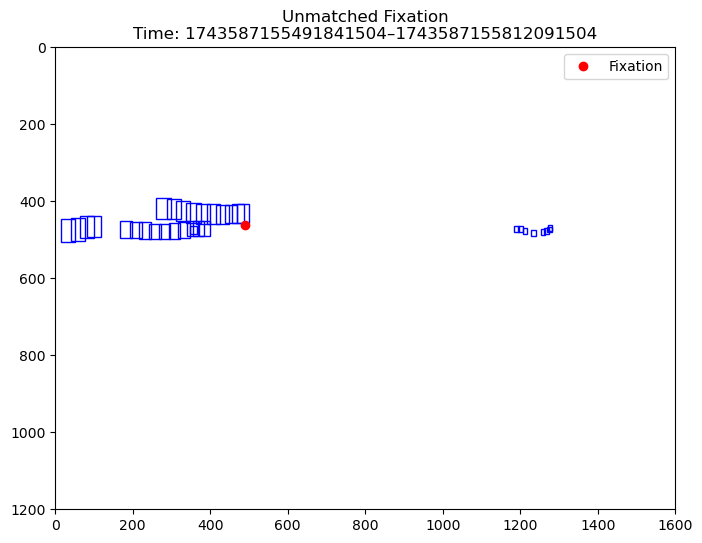

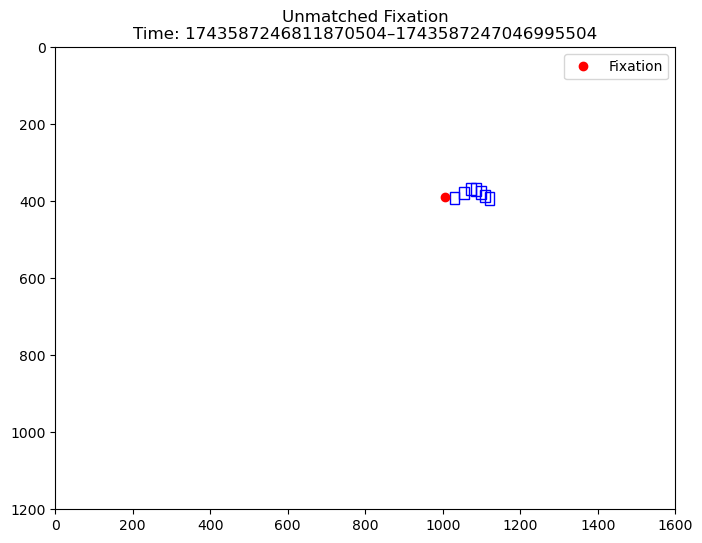

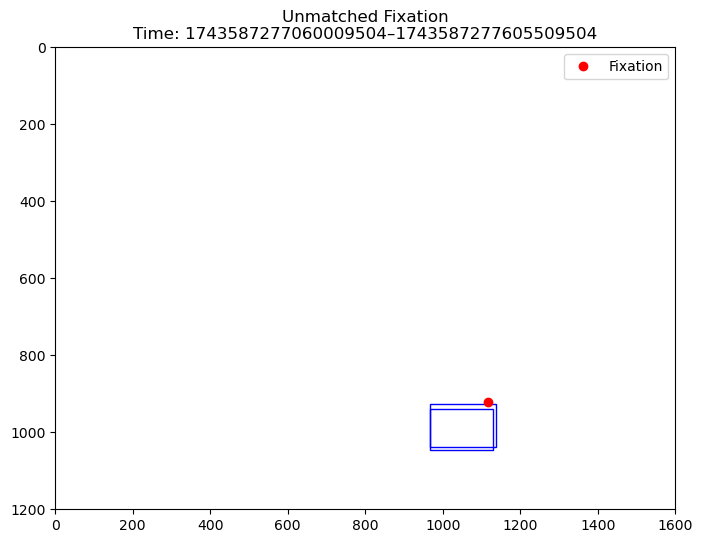

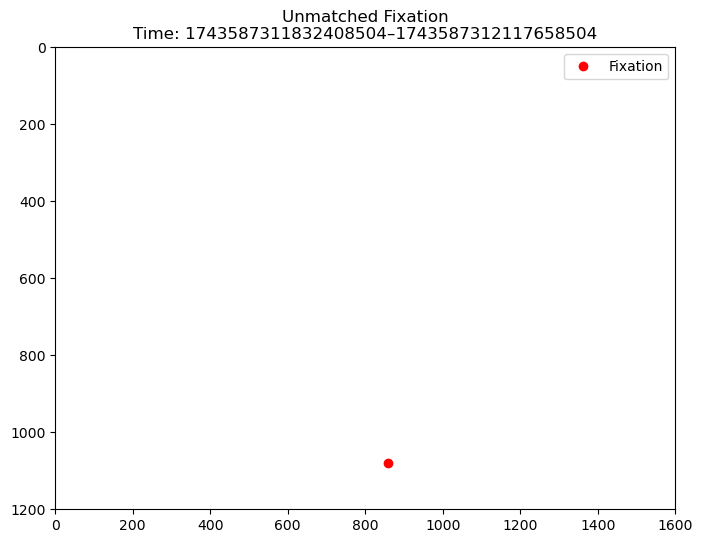

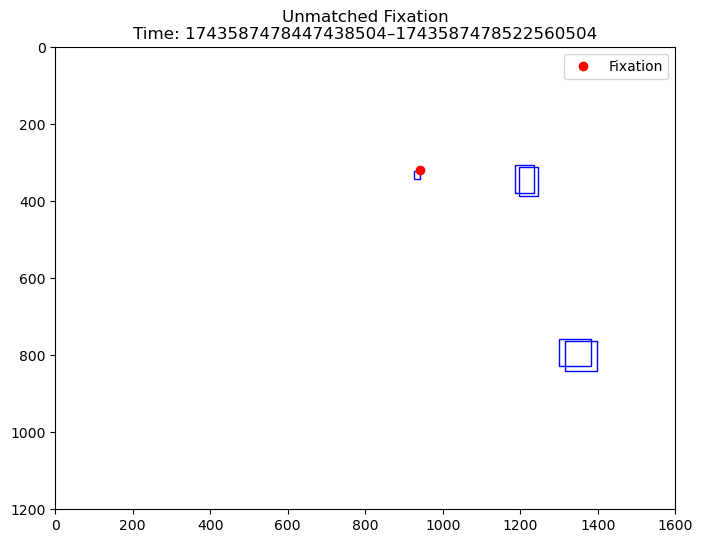

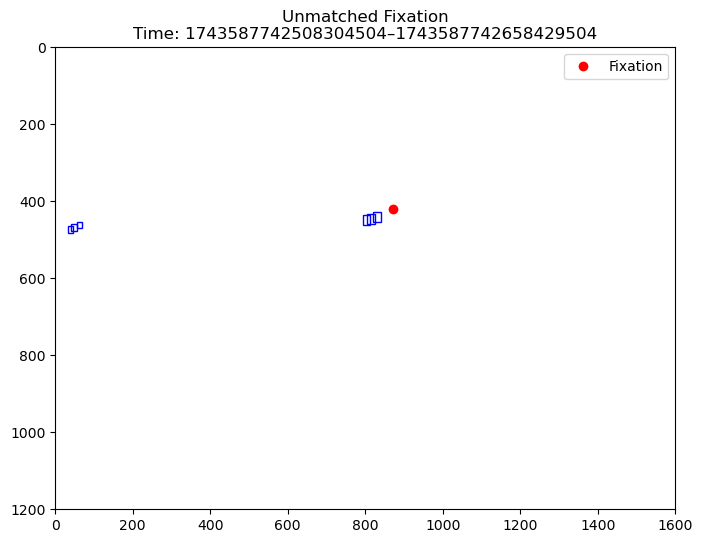

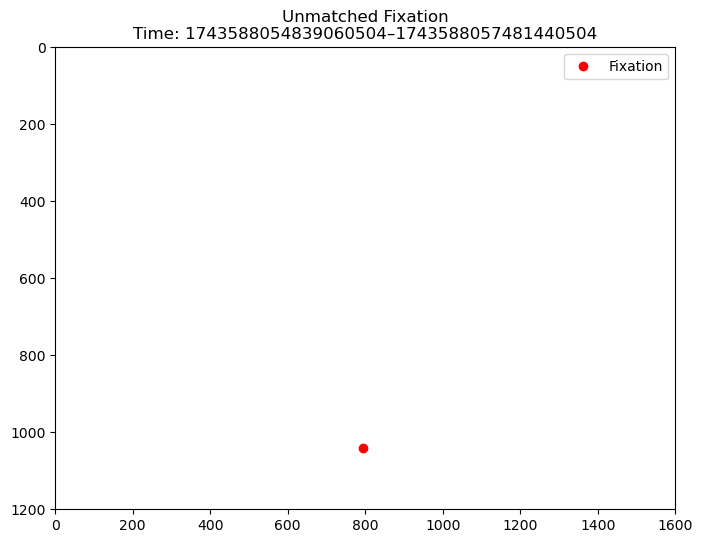

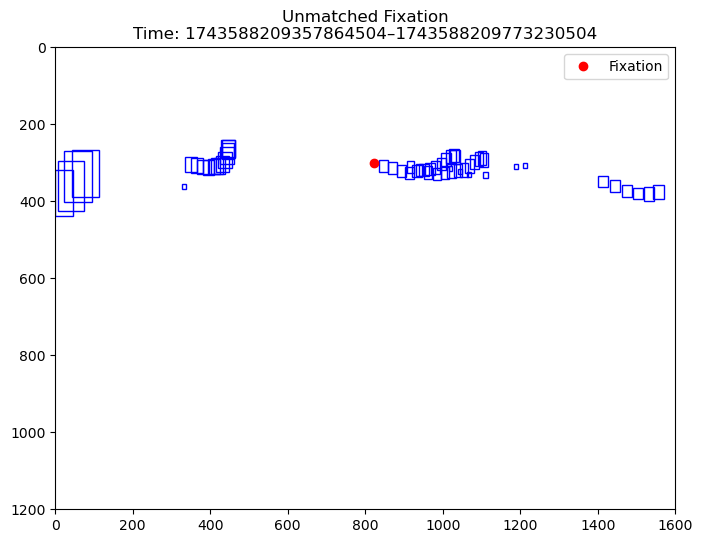

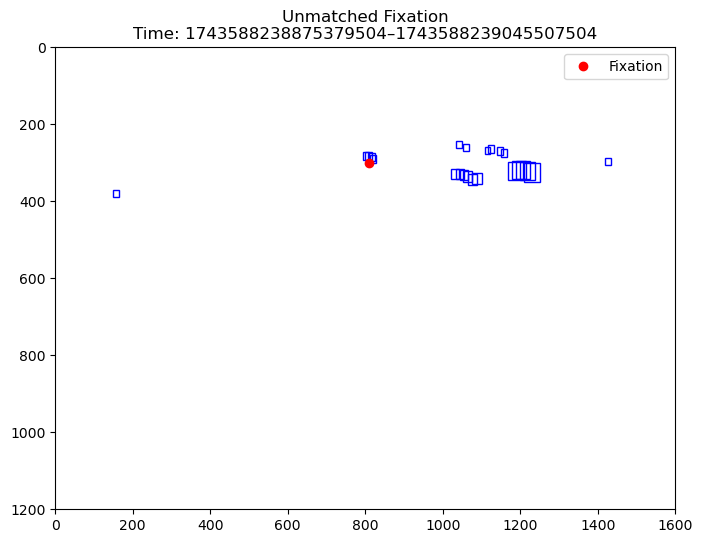

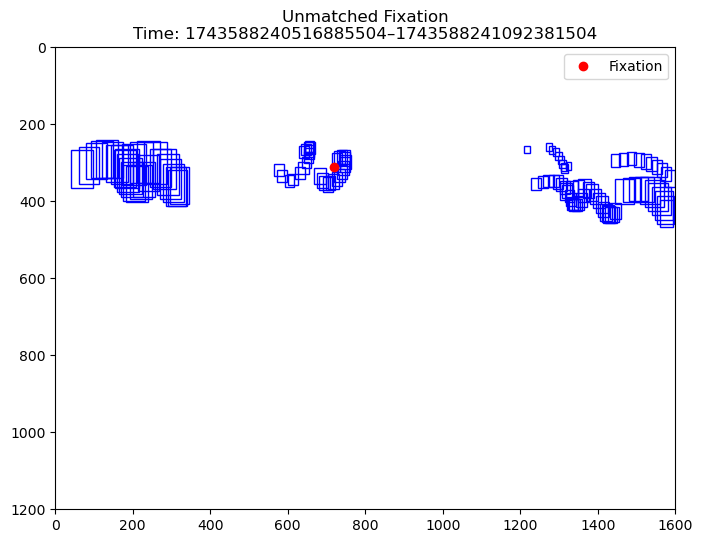

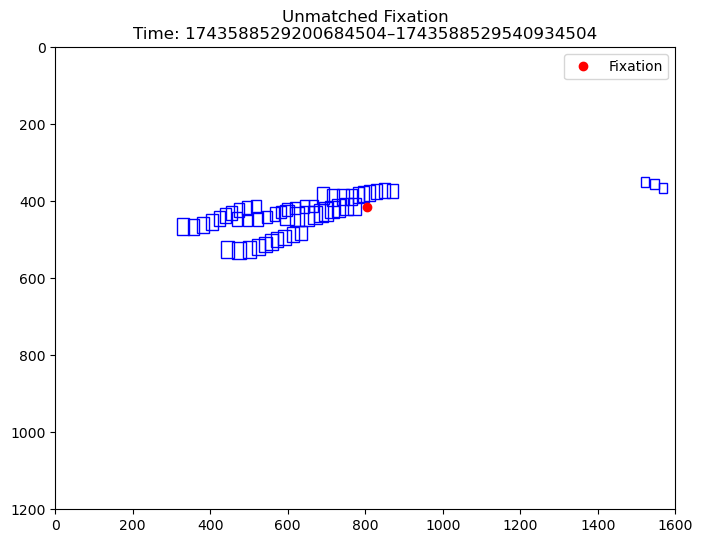

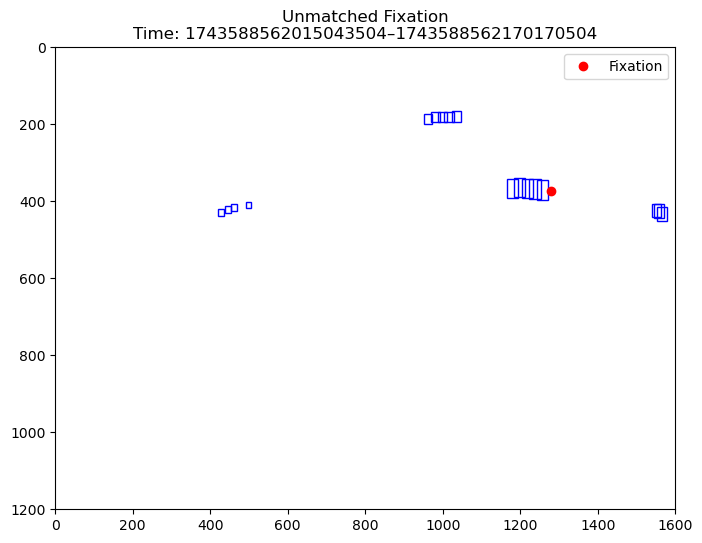

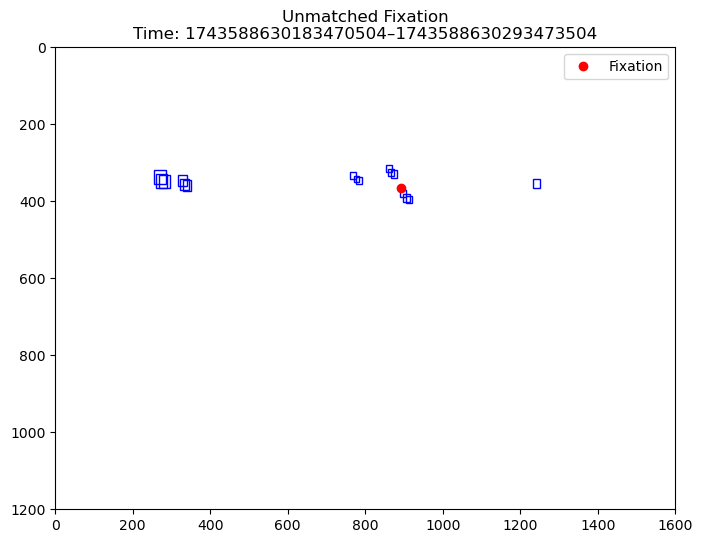

In [24]:
## This block ilustrates unmatched fixations (in the proportion of the video image size)
# draws all face bounding boxes detected during that video frame

# this loop goes over the all the unmatched fixations for the selected recording 
# and plots all face detections (the bounding boxes) detected during the time of that fixation and the fixation itself
for _, row in unmatched_df.iterrows():
    if not row['falls_in_any_bbox']:  # Only show unmatched fixations
        ts_start = row['start timestamp [ns]'] # start time
        ts_end = row['end timestamp [ns]_x']   # end time
        fx, fy = row['fixation x [px]'], row['fixation y [px]'] #fixation coordinates

        # Get all face detections within this timestamp range
        candidates = face_detections_df[
            (face_detections_df['timestamp [ns]'] >= ts_start) &
            (face_detections_df['timestamp [ns]'] <= ts_end)
        ]

        # Create a plot for each unmatched fixation
        plt.figure(figsize=(8, 6))
        ax = plt.gca()

        # plotting all faces detected during that fixation (blue rectangles)
        for _, det in candidates.iterrows():
            x1, y1 = det['p1 x [px]'], det['p1 y [px]']
            x2, y2 = det['p2 x [px]'], det['p2 y [px]']
            width, height = x2 - x1, y2 - y1
            ax.add_patch(plt.Rectangle((x1, y1), width, height, fill=False, edgecolor='blue'))

        # Plot the fixation point (red dot)
        plt.plot(fx, fy, 'ro', label="Fixation")

        # Set video coordinate limits
        plt.xlim(0, 1600)
        plt.ylim(0, 1200)
        plt.gca().invert_yaxis()  # Invert Y-axis for video/image coordinates

        plt.title(f"Unmatched Fixation\nTime: {ts_start}–{ts_end}")
        plt.legend()
        plt.show()